<a href="https://colab.research.google.com/github/hamsterler/DataAnalyst_Capstone/blob/main/bellabeat_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

# **Heart Rate Monitor**

In [8]:
heartrate_second = pd.read_csv('heartrate_seconds_merged.csv')
heartrate_second.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [9]:
heartrate_second.sort_values(['Id', 'Time'])

,Id,Time,Value
1027,2022484408,4/12/2016 10:00:00 AM,84
1028,2022484408,4/12/2016 10:00:10 AM,85
1029,2022484408,4/12/2016 10:00:15 AM,86
1030,2022484408,4/12/2016 10:00:20 AM,87
1031,2022484408,4/12/2016 10:00:25 AM,89
...,...,...,...
2459799,8877689391,5/9/2016 9:59:40 AM,58
2465907,8877689391,5/9/2016 9:59:41 PM,79
2459800,8877689391,5/9/2016 9:59:45 AM,59
2465908,8877689391,5/9/2016 9:59:46 PM,80


In [10]:
heartrate_second['Time'] = pd.to_datetime(heartrate_second['Time'])

In [11]:
fmin_hrt = heartrate_second[(heartrate_second['Time'].dt.minute).astype(int) % 5 == 0]

fmin_hrt['hour'] = fmin_hrt['Time'].dt.hour.astype(int)
fmin_hrt['minute'] = fmin_hrt['Time'].dt.minute.astype(int)

fmin_hrt = fmin_hrt.groupby(['Id', 'hour', 'minute']).mean()
fmin_hrt = fmin_hrt.reset_index()
fmin_hrt['Time'] = fmin_hrt['hour'] + fmin_hrt['minute']/100
print(fmin_hrt)

              Id  hour  minute      Value   Time
0     2022484408     6       0  75.375000   6.00
1     2022484408     6       5  70.300000   6.05
2     2022484408     6      10  71.312500   6.10
3     2022484408     6      15  70.900000   6.15
4     2022484408     6      20  68.214286   6.20
...          ...   ...     ...        ...    ...
3562  8877689391    23      35  79.200000  23.35
3563  8877689391    23      40  69.500000  23.40
3564  8877689391    23      45  76.882353  23.45
3565  8877689391    23      50  84.062500  23.50
3566  8877689391    23      55  79.000000  23.55

[3567 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


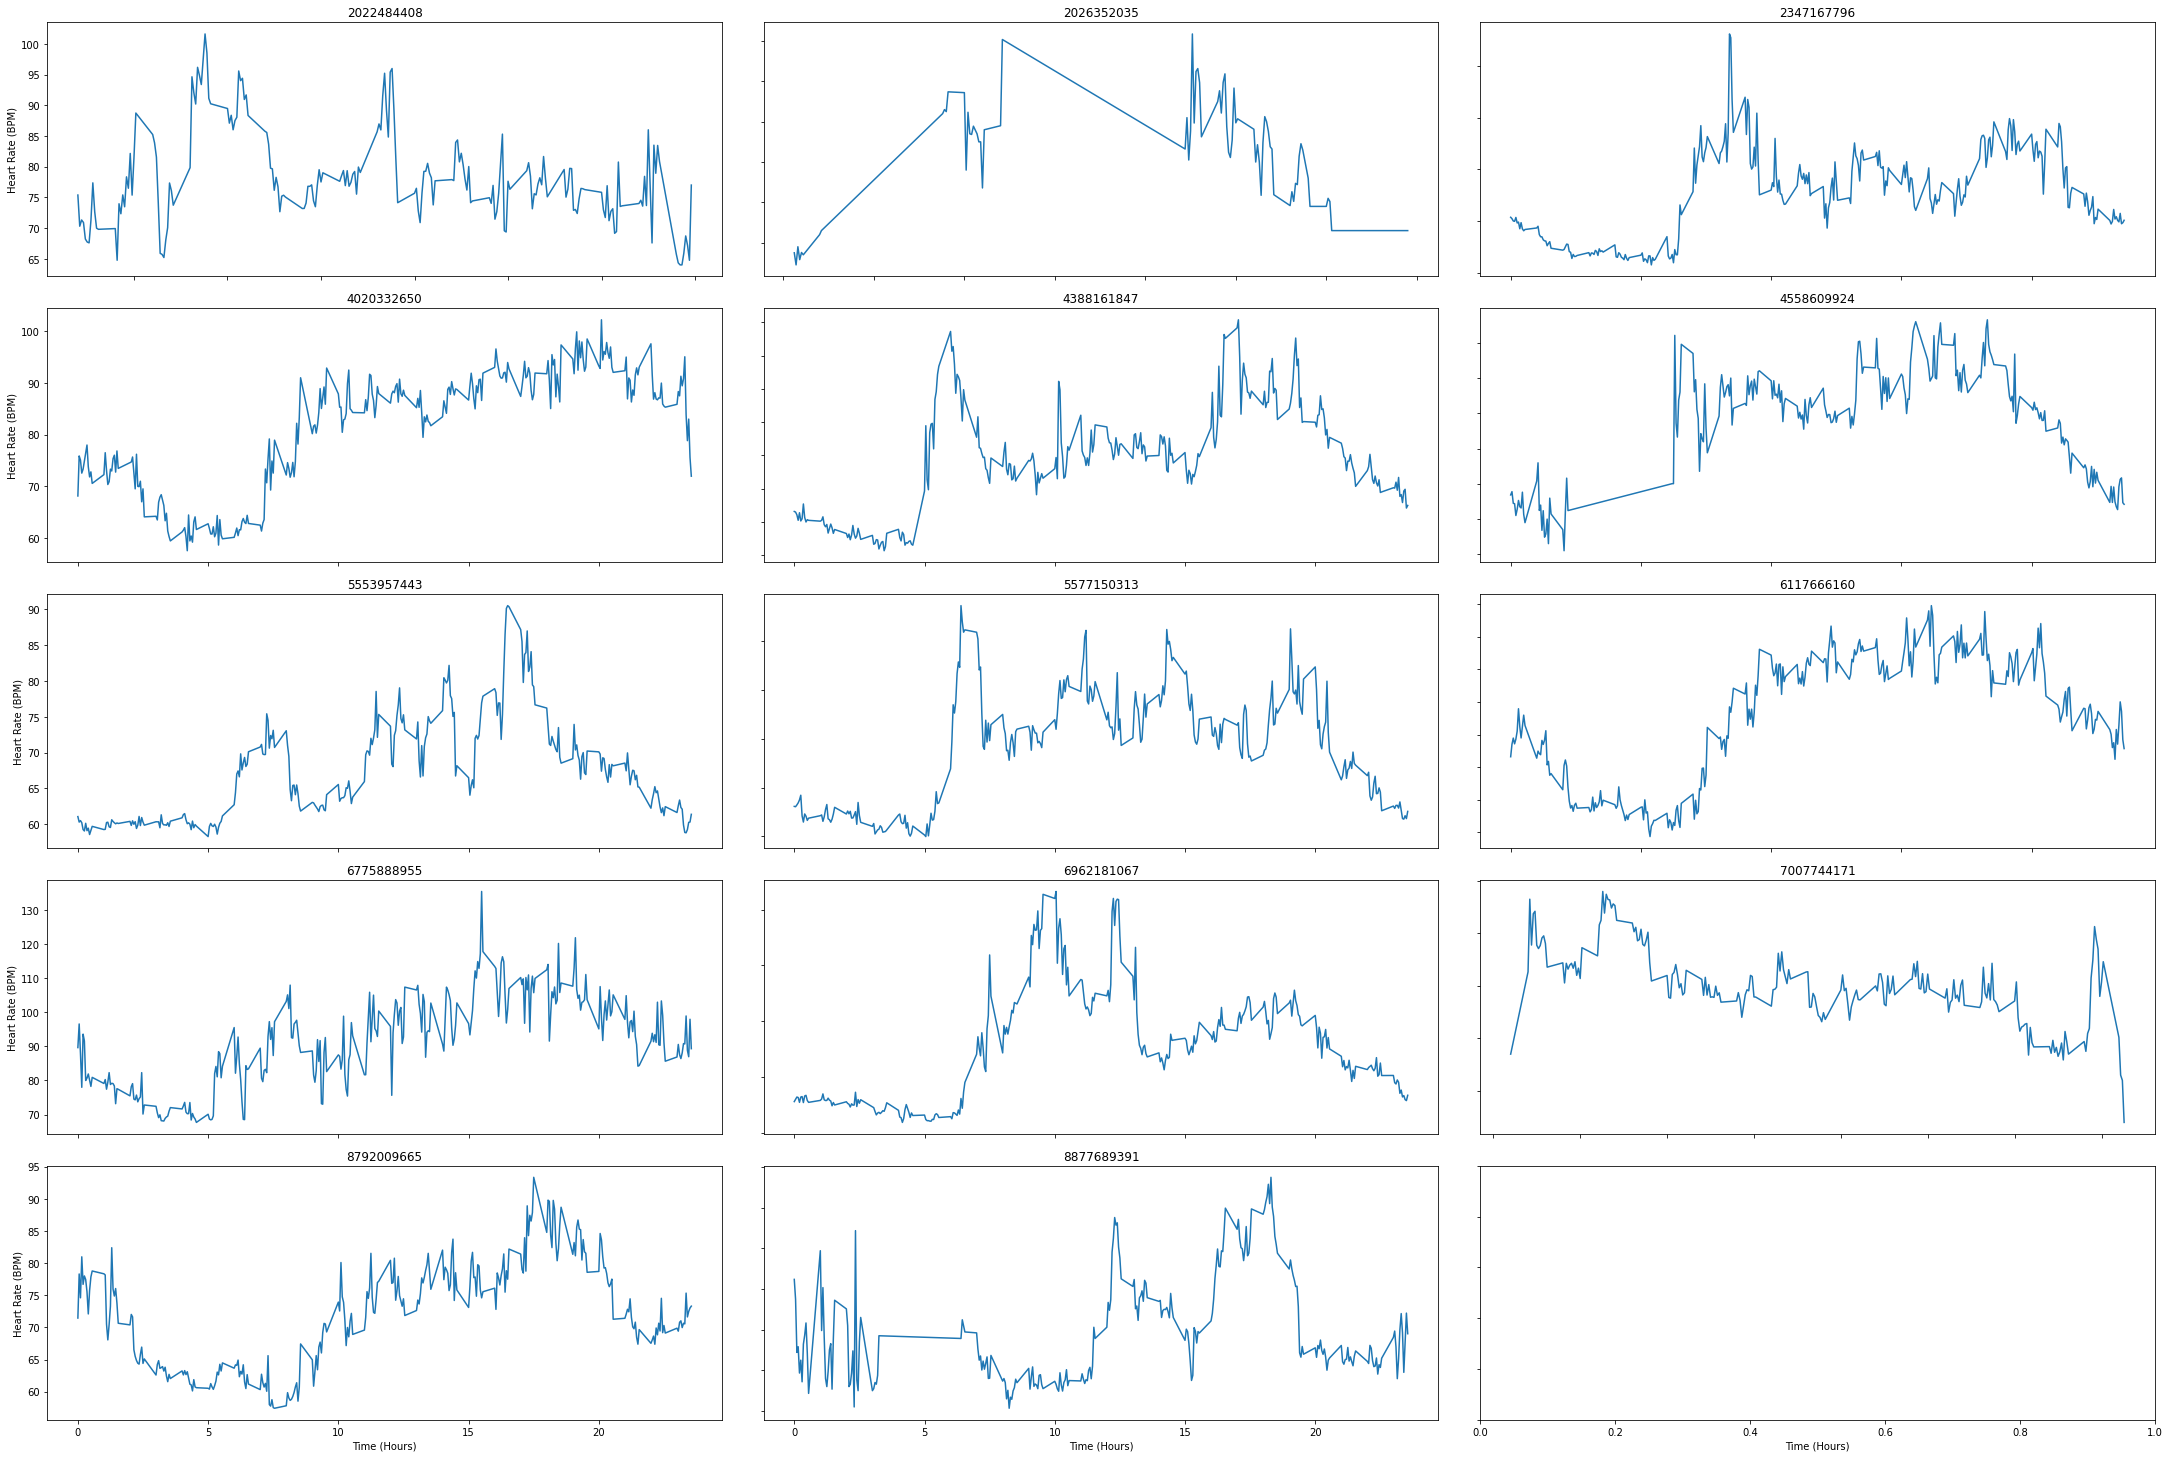

In [12]:
col = 3
row = int(len(hrt_id) / col) if (len(hrt_id)%col==0) else int(len(hrt_id) / col) + 1
#define subplots
fig, ax = plt.subplots(row, col, figsize=(col * 10,row * 4))
fig.tight_layout()
for a in ax.flat:
    a.set(xlabel = 'Time (Hours)', ylabel = 'Heart Rate (BPM)')
    a.label_outer()
    
a = 0
for id in hrt_id:
    x = fmin_hrt.loc[(fmin_hrt['Id'] == id), 'Time']
    y = fmin_hrt.loc[(fmin_hrt['Id'] == id), 'Value']
    ax[int(a/col), a%col].plot(x, y)
    ax[int(a/col), a%col].title.set_text(id)
    a += 1


# **Daily Step**

In [13]:
hourly_step = pd.read_csv('hourlySteps_merged.csv')
step_id = hourly_step['Id'].unique()
hourly_step['ActivityHour'] = pd.to_datetime(hourly_step['ActivityHour'])

In [14]:
hourly_step['hour'] = hourly_step['ActivityHour'].dt.hour
daily_step = hourly_step.groupby(['Id', 'hour']).mean()
daily_step = daily_step.reset_index()

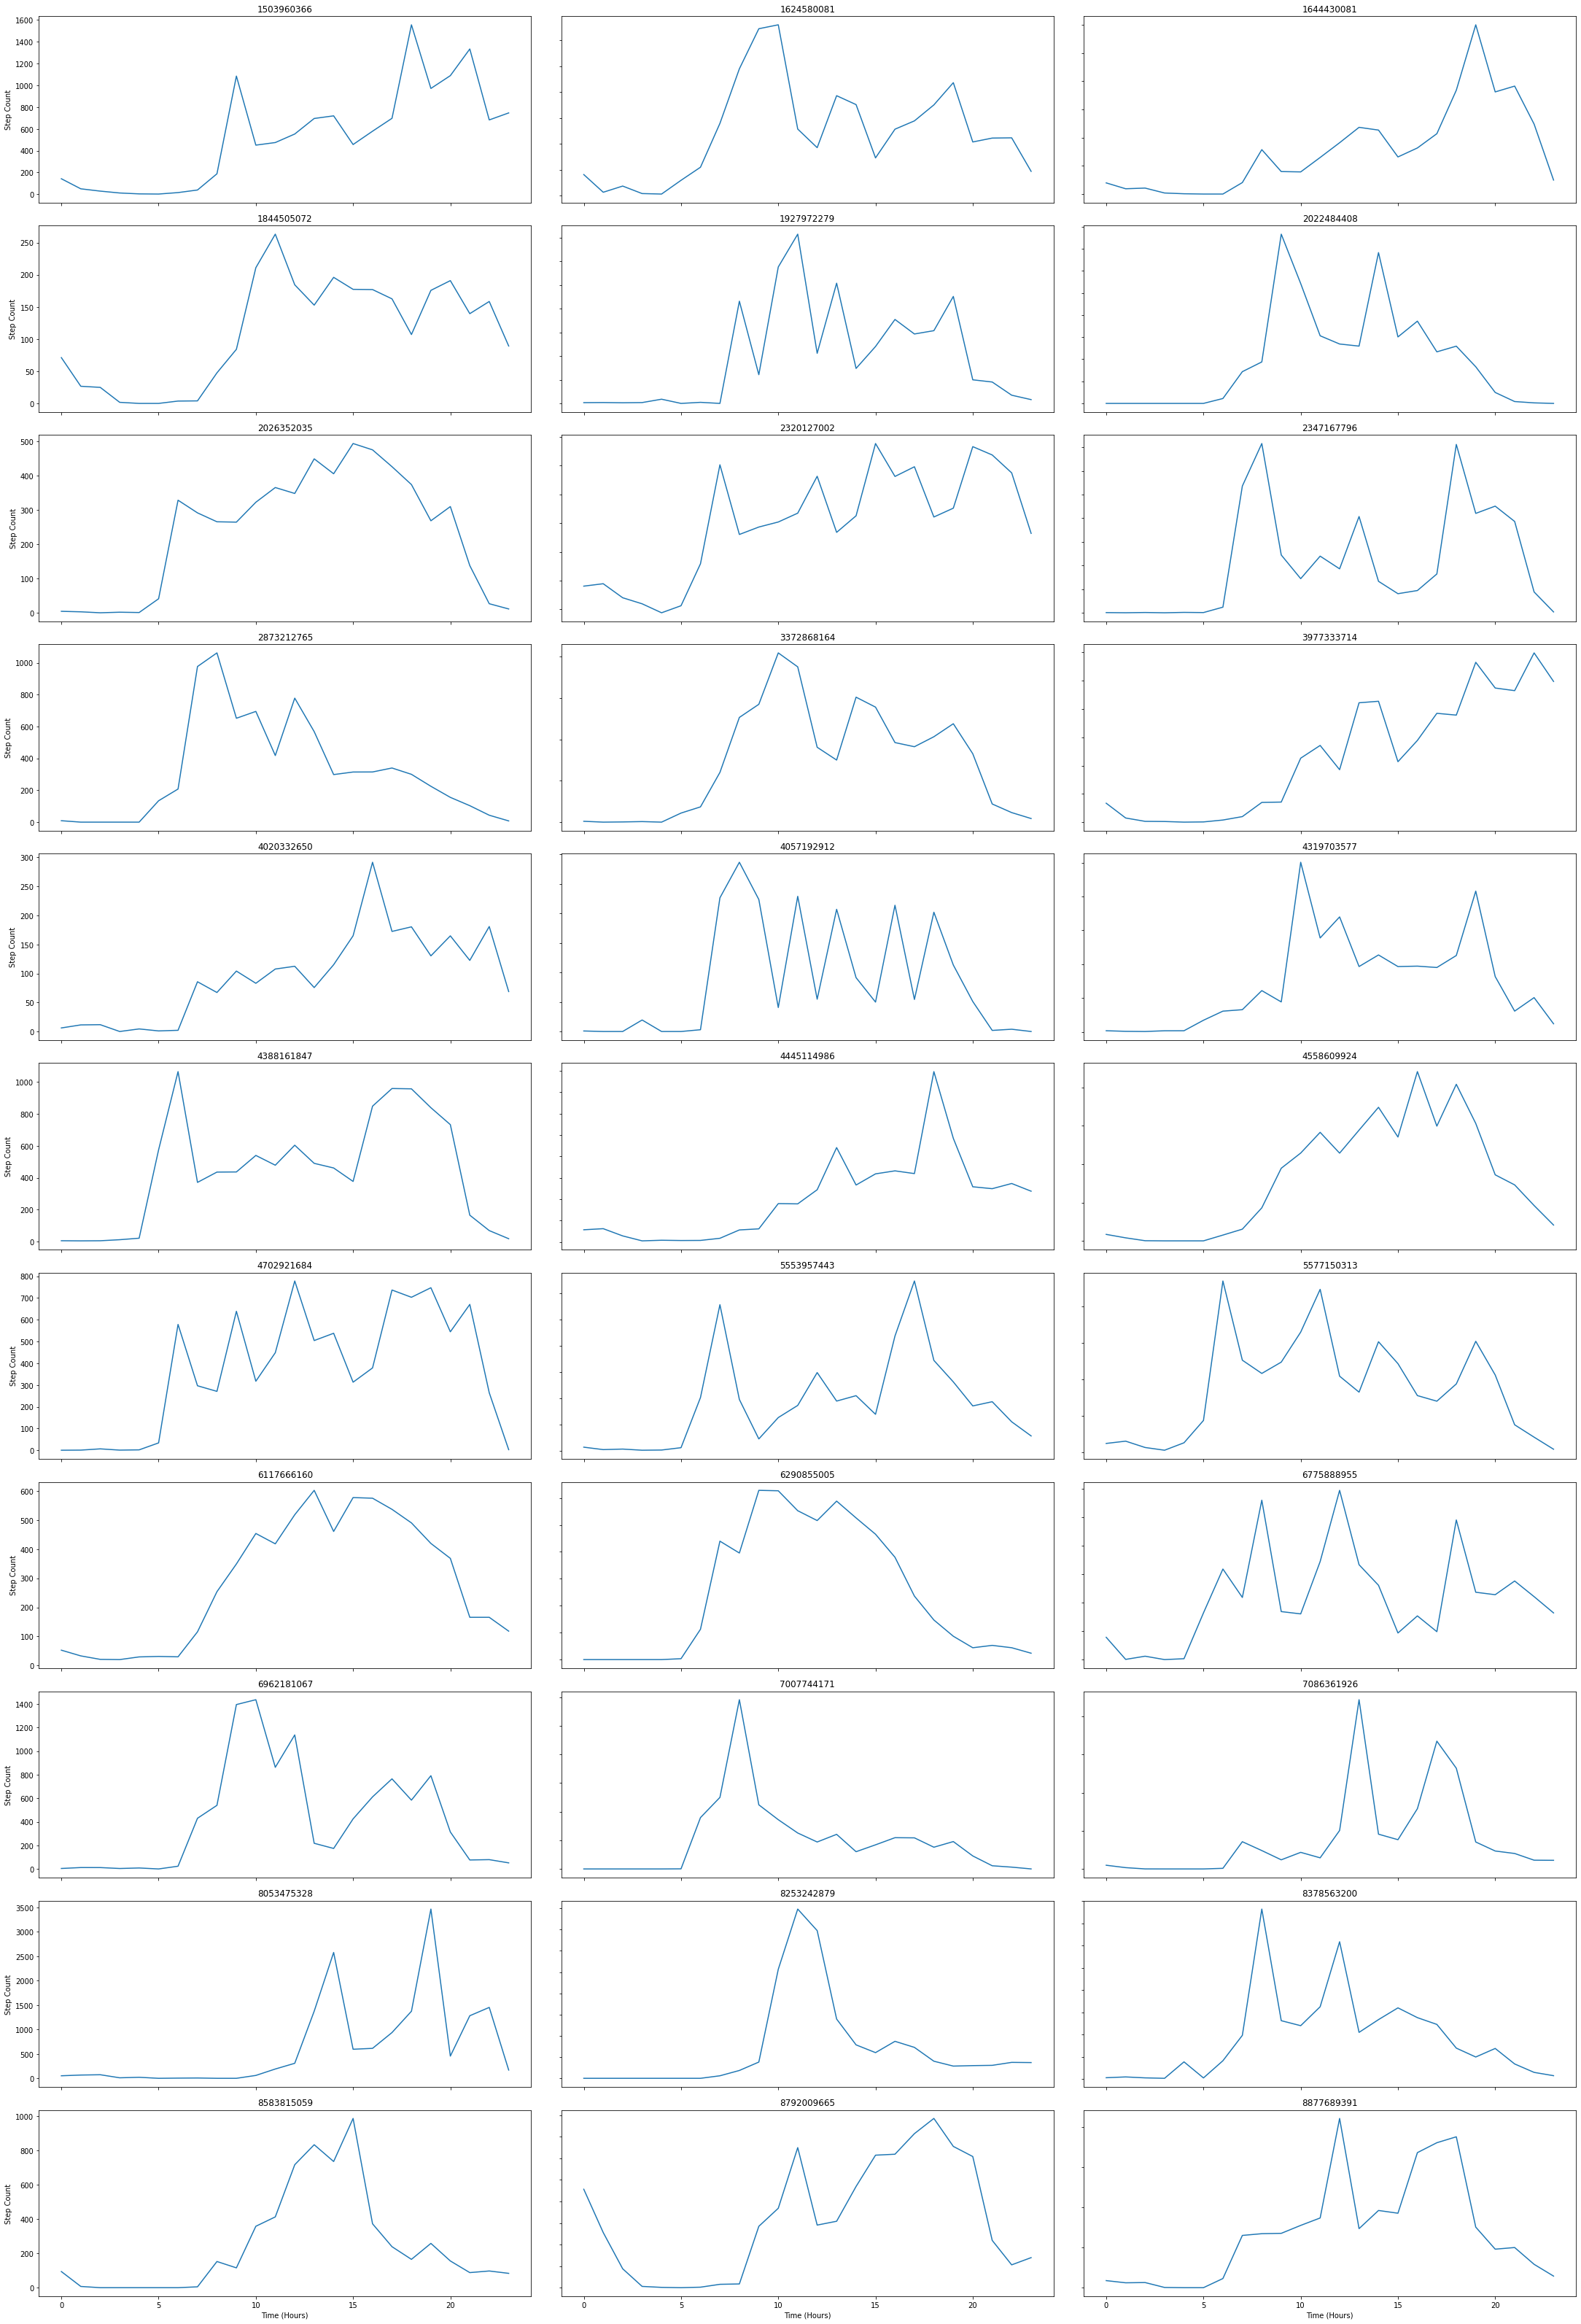

In [15]:
col = 3
row = int(len(step_id) / col) if (len(step_id)%col==0) else int(len(step_id) / col) + 1

#define subplots
fig, ax = plt.subplots(row, col, figsize=(col * 10, row * 4))
fig.tight_layout()
for a in ax.flat:
    a.set(xlabel = 'Time (Hours)', ylabel = 'Step Count')
    a.label_outer()
    
a = 0
for id in step_id:
    x = daily_step.loc[(daily_step['Id'] == id), 'hour']
    y = daily_step.loc[(daily_step['Id'] == id), 'StepTotal']
    ax[int(a/col), a%col].plot(x, y)
    ax[int(a/col), a%col].title.set_text(id)
    a += 1


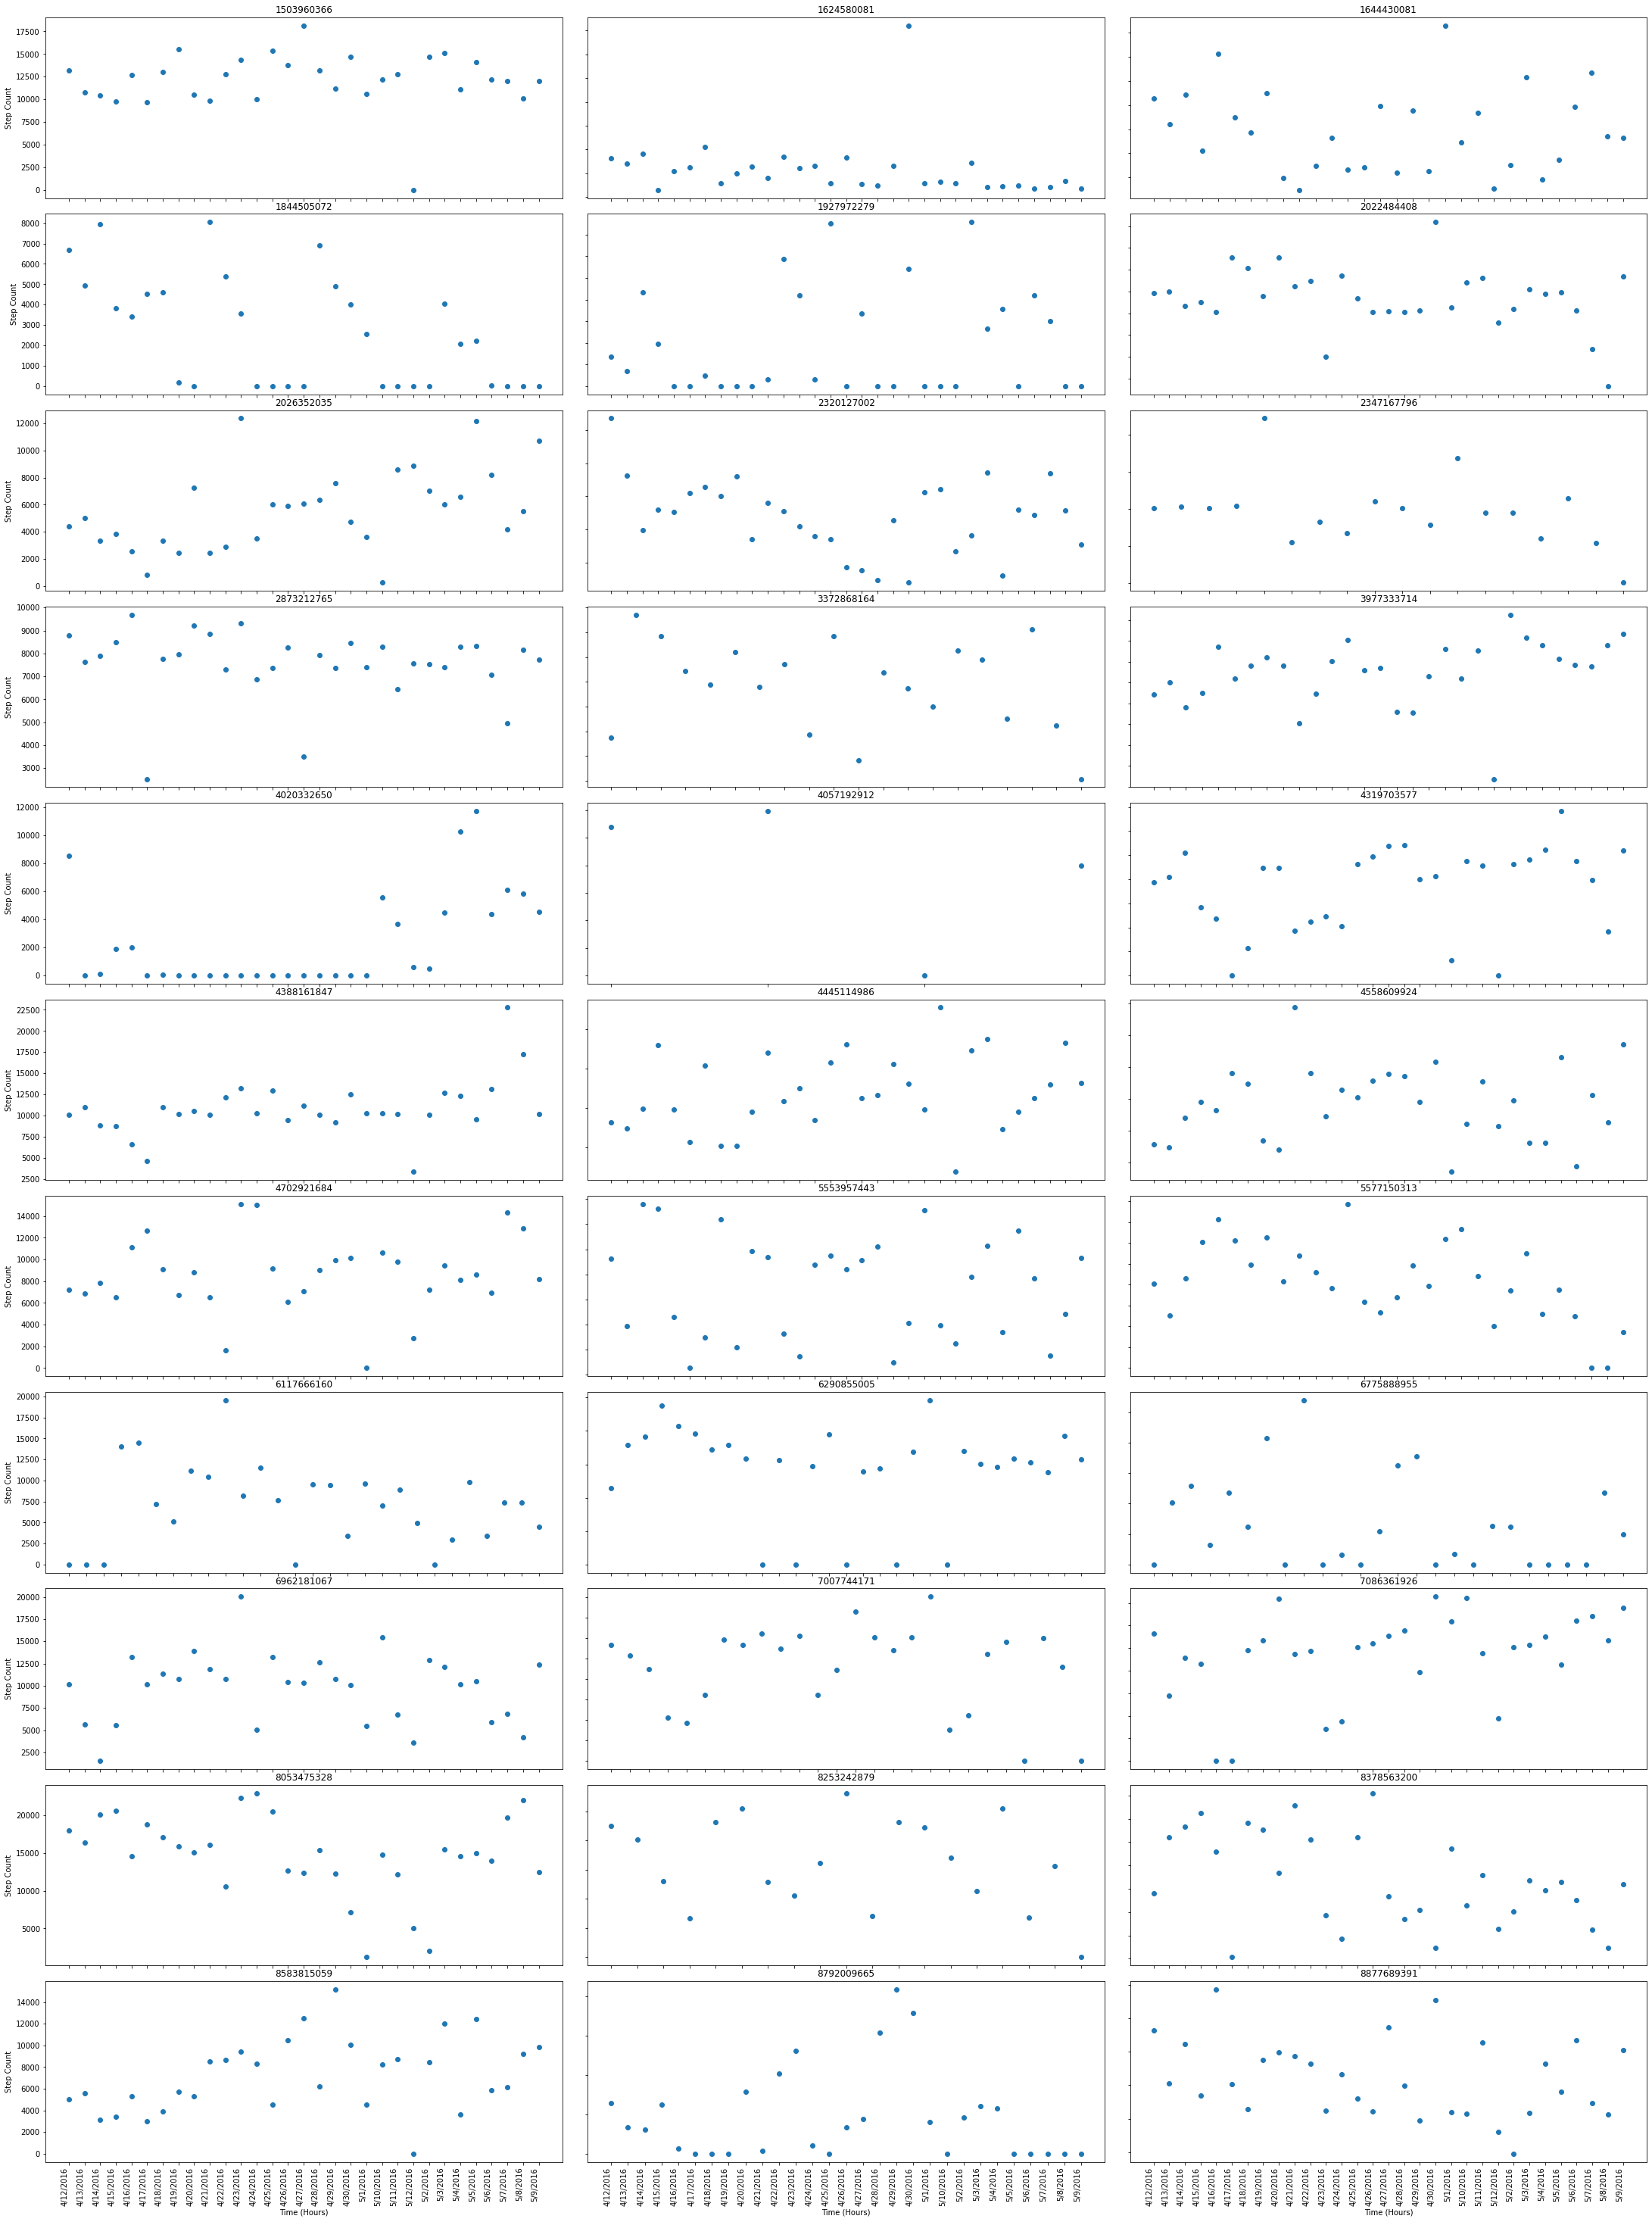

In [16]:
daily_step = pd.read_csv('dailySteps_merged.csv')

#rename column
daily_step.columns = daily_step.columns.str.replace('ActivityDay','Date')

ids = daily_step['Id'].unique()
daily_step = daily_step.groupby(['Id', 'Date']).mean()
daily_step = daily_step.reset_index()

row = 11
col = 3
#define subplots
fig, ax = plt.subplots(row, col, figsize=(30,40))
fig.autofmt_xdate(rotation=90)
fig.tight_layout()
for a in ax.flat:
    a.set(xlabel = 'Time (Hours)', ylabel = 'Step Count')
    a.label_outer()
    
a = 0
for id in ids:
    x = daily_step.loc[(daily_step['Id'] == id), 'Date']
    y = daily_step.loc[(daily_step['Id'] == id), 'StepTotal']
    ax[int(a/col), a%col].scatter(x, y)
    ax[int(a/col), a%col].title.set_text(id)
    a += 1


# **Daily Activity**

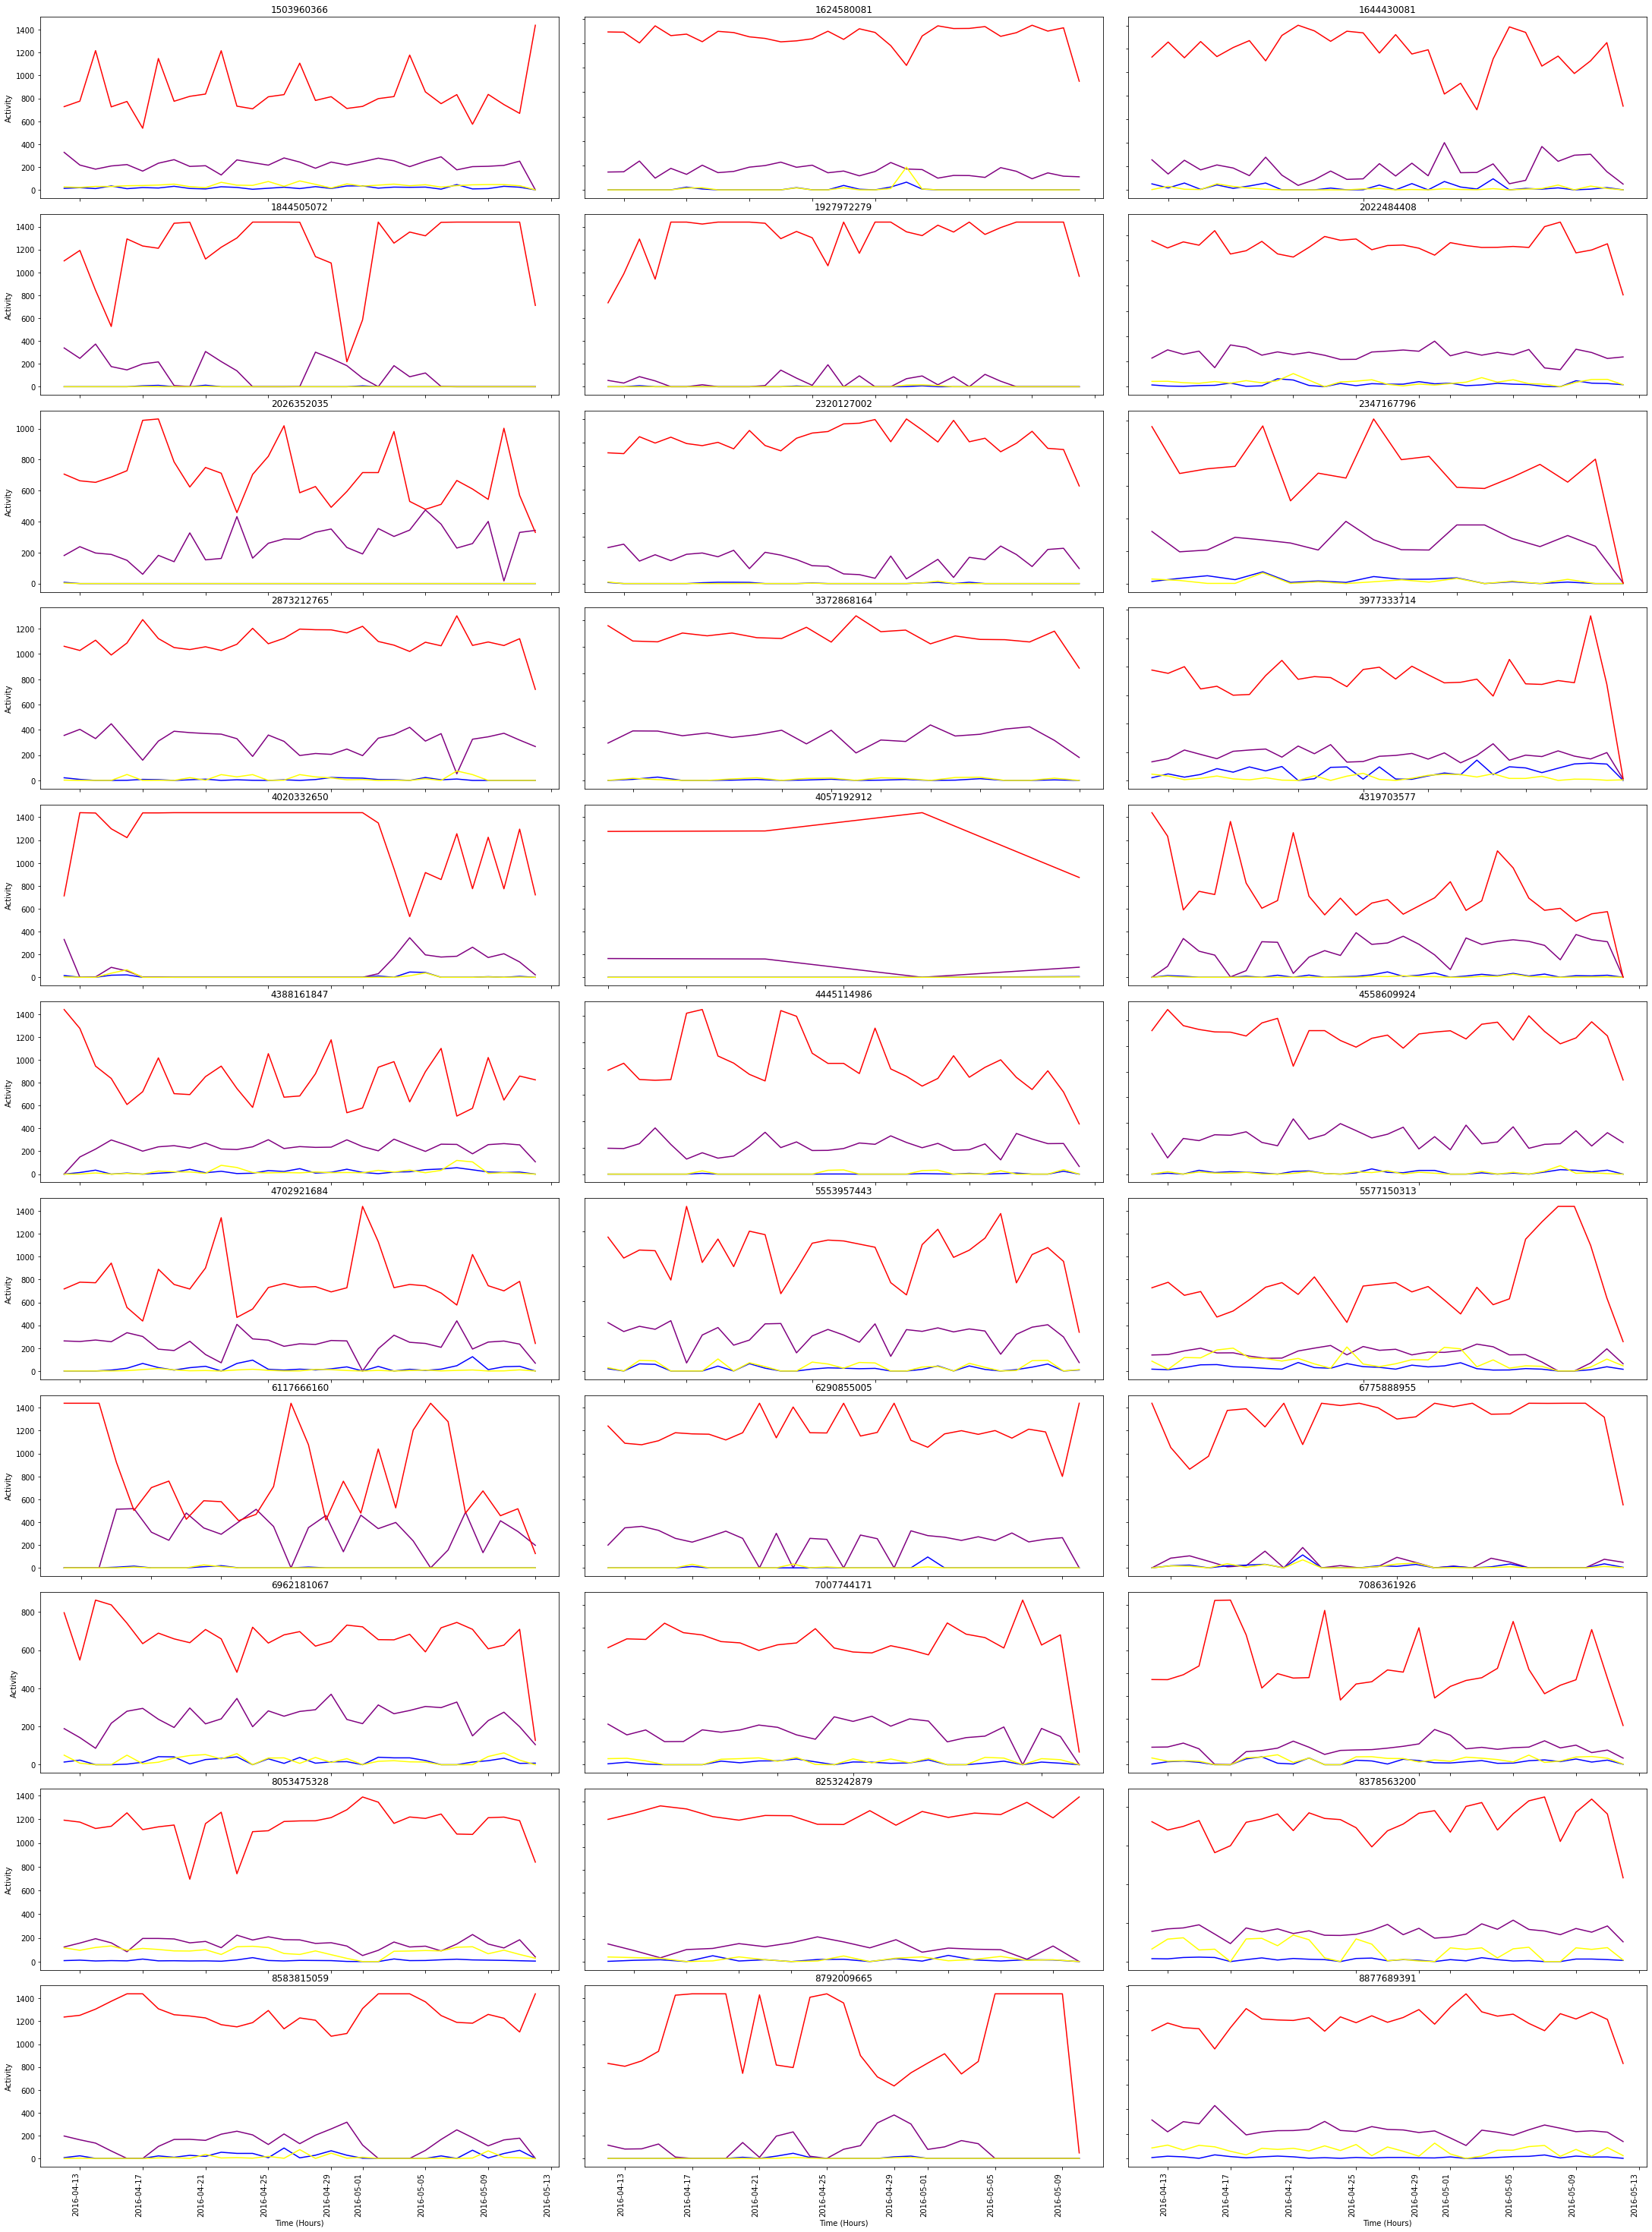

In [17]:
daily_activity = pd.read_csv('dailyActivity_merged.csv')
daily_activity.columns = daily_activity.columns.str.replace('ActivityDate', 'Date')   #rename column from "ActivityDate" to "Date"
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])                       #convert string to datetime
daily_id = daily_activity['Id'].unique()                                              #get category id(unique Id)


row = 11
col = 3
#define subplots
fig, ax = plt.subplots(row, col, figsize=(30,40))
fig.autofmt_xdate(rotation=90)
fig.tight_layout()
for a in ax.flat:
    a.set(xlabel = 'Time (Hours)', ylabel = 'Activity')
    a.label_outer()
    
a = 0
for id in daily_id:
    x = daily_activity.loc[(daily_activity['Id'] == id), 'Date']
    y_light = daily_activity.loc[(daily_activity['Id'] == id), 'LightlyActiveMinutes']
    y_fair = daily_activity.loc[(daily_activity['Id'] == id), 'FairlyActiveMinutes']
    y_active = daily_activity.loc[(daily_activity['Id'] == id), 'VeryActiveMinutes']
    y_seden = daily_activity.loc[(daily_activity['Id'] == id), 'SedentaryMinutes'] 
    ax[int(a/col), a%col].plot(x, y_light, color = 'purple')
    ax[int(a/col), a%col].plot(x, y_fair, color = 'blue')
    ax[int(a/col), a%col].plot(x, y_active, color = 'yellow')
    ax[int(a/col), a%col].plot(x, y_seden, color = 'red')
    ax[int(a/col), a%col].title.set_text(id)
    a += 1

# **Sleep Tracking**

In [18]:
daily_sleep = pd.read_csv('sleepDay_merged.csv')
#rename
daily_sleep.columns = daily_sleep.columns.str.replace('SleepDay', 'Date')

daily_sleep['Date'] = pd.to_datetime(daily_sleep['Date'])
print(daily_sleep)

             Id       Date  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12                  1                 327   
1    1503960366 2016-04-13                  2                 384   
2    1503960366 2016-04-15                  1                 412   
3    1503960366 2016-04-16                  2                 340   
4    1503960366 2016-04-17                  1                 700   
..          ...        ...                ...                 ...   
408  8792009665 2016-04-30                  1                 343   
409  8792009665 2016-05-01                  1                 503   
410  8792009665 2016-05-02                  1                 415   
411  8792009665 2016-05-03                  1                 516   
412  8792009665 2016-05-04                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             3

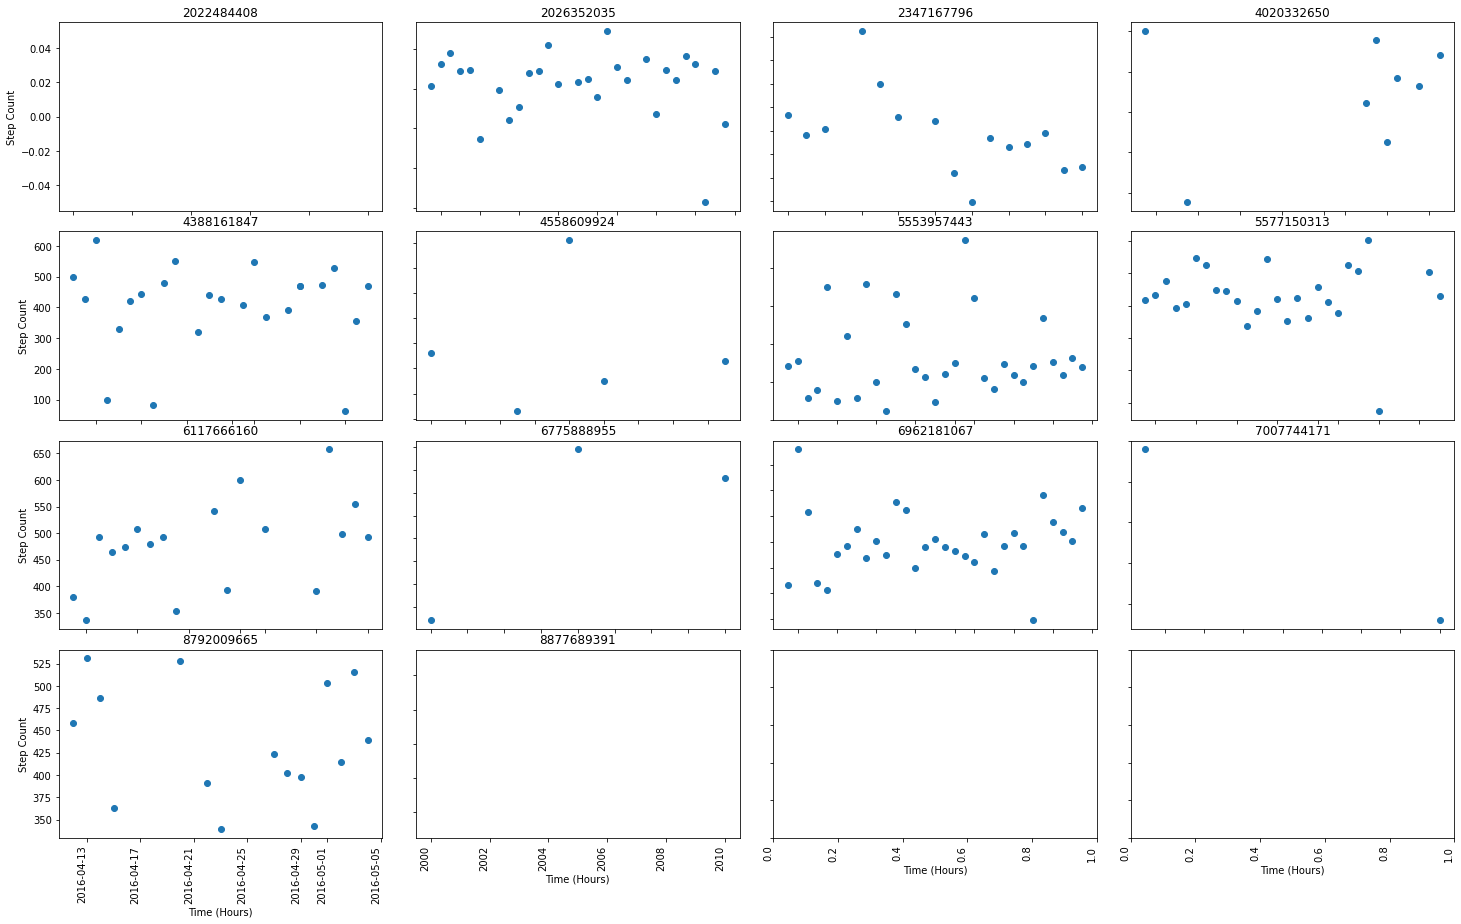

In [19]:
from sklearn.linear_model import LinearRegression
#define subplots

fig, ax = plt.subplots(4, 4, figsize=(20,12))
fig.autofmt_xdate(rotation=90)
fig.tight_layout()

for a in ax.flat:
    a.set(xlabel = 'Time (Hours)', ylabel = 'Step Count')
    a.label_outer()
    
a = 0
for id in hrt_id: 
    x = daily_sleep.loc[(daily_sleep['Id'] == id), 'Date']
    y = daily_sleep.loc[(daily_sleep['Id'] == id), 'TotalMinutesAsleep']
    
    ax[int(a/4), a%4].scatter(x, y)
    ax[int(a/4), a%4].title.set_text(id)
    a += 1

# **Average Tracking each ID**

Merging dailyActivity table with dailyCalories by using Id and Date

In [20]:
merged_data = daily_activity.merge(daily_sleep, on = ['Id', 'Date'], how = 'outer')
merged_data.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0


In [21]:
avg_data = merged_data.groupby(['Id']).mean()
avg_data = avg_data.reset_index()
avg_data.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,1.08,360.28,383.2
1,1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839,NaN,NaN,NaN
2,1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000,1.00,294.00,346.0
3,1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871,1.00,652.00,961.0
4,1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452,1.60,417.00,437.8


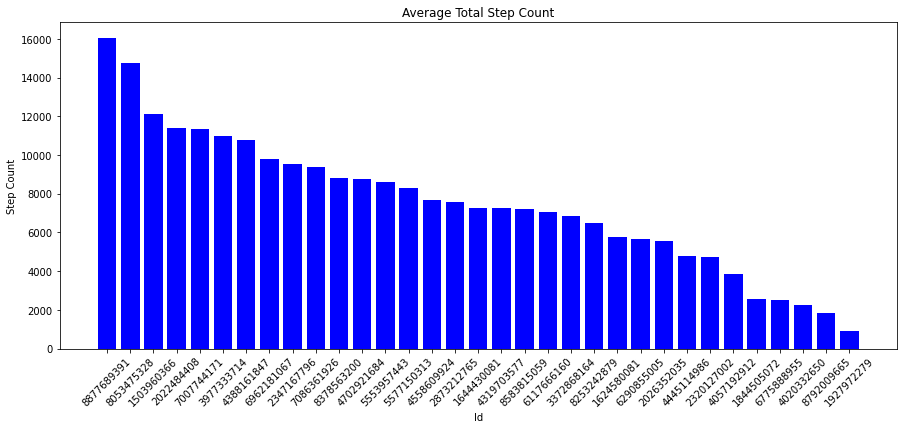

In [22]:
sorted_data = avg_data.sort_values('TotalSteps', ascending = False)
x = sorted_data.Id.astype(str)
y = sorted_data.TotalSteps

fig = plt.figure(figsize = (15, 6))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.8)
plt.xticks(rotation = 45)
plt.title("Average Total Step Count")
plt.xlabel("Id")
plt.ylabel("Step Count")
plt.show()

In [23]:
count = 0
for data in sorted_data.TotalSteps:
    count = count + 1 if data > 10000 else count
print( str(round(count / len(sorted_data.Id) * 100, 2)) + "% of users that walk more than 10,000 step per day.")

21.21% of users that walk more than 10,000 step per day.


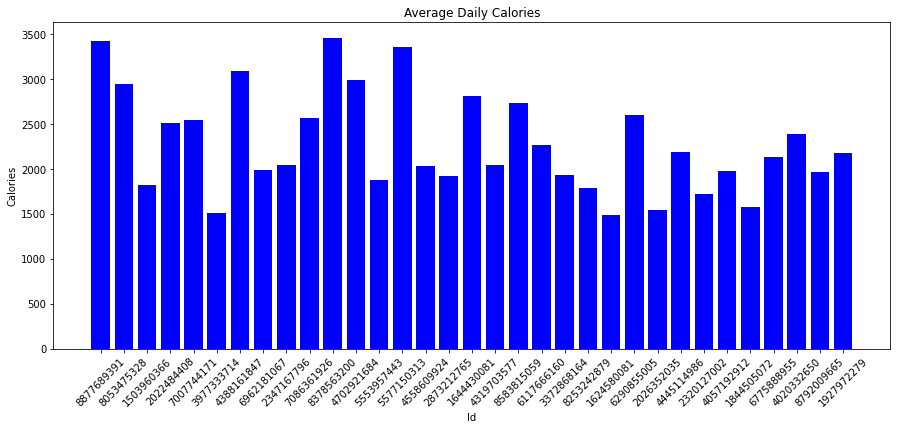

In [24]:
x = sorted_data.Id.astype(str)
y = sorted_data.Calories
# creating the bar plot
fig = plt.figure(figsize = (15, 6))
plt.bar(x, y, color ='blue',
        width = 0.8)
plt.xticks(rotation = 45)
plt.title("Average Daily Calories")
plt.xlabel("Id")
plt.ylabel("Calories")
plt.show()

In [25]:
count = 0
for data in sorted_data.Calories:
    count = count + 1 if data < 2000 else count
print(str(round(count/ len(sorted_data.Id) * 100, 2)) + "% of users burning < 2,000 cal/day")

39.39% of users burning < 2,000 cal/day


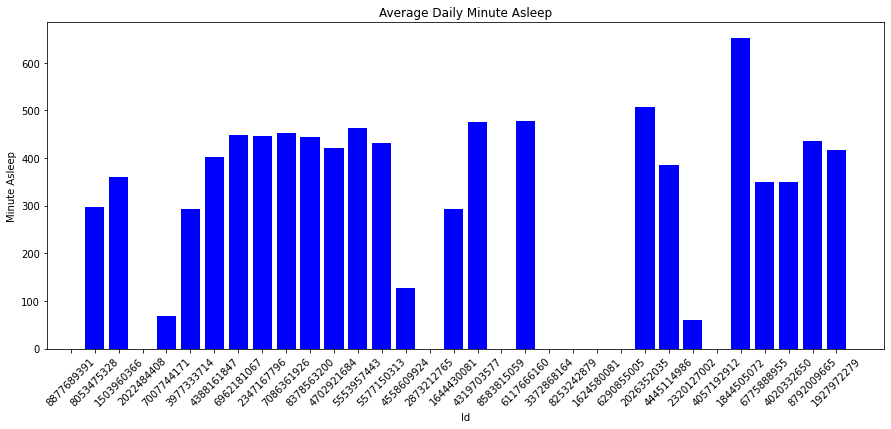

In [26]:
x = sorted_data.Id.astype(str)
y = sorted_data.TotalMinutesAsleep
# creating the bar plot
fig = plt.figure(figsize = (15, 6))
plt.bar(x, y, color ='blue',
        width = 0.8)
plt.xticks(rotation = 45)
plt.title("Average Daily Minute Asleep")
plt.xlabel("Id")
plt.ylabel("Minute Asleep")
plt.show()

In [27]:
active_data = sorted_data[['Id', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']]

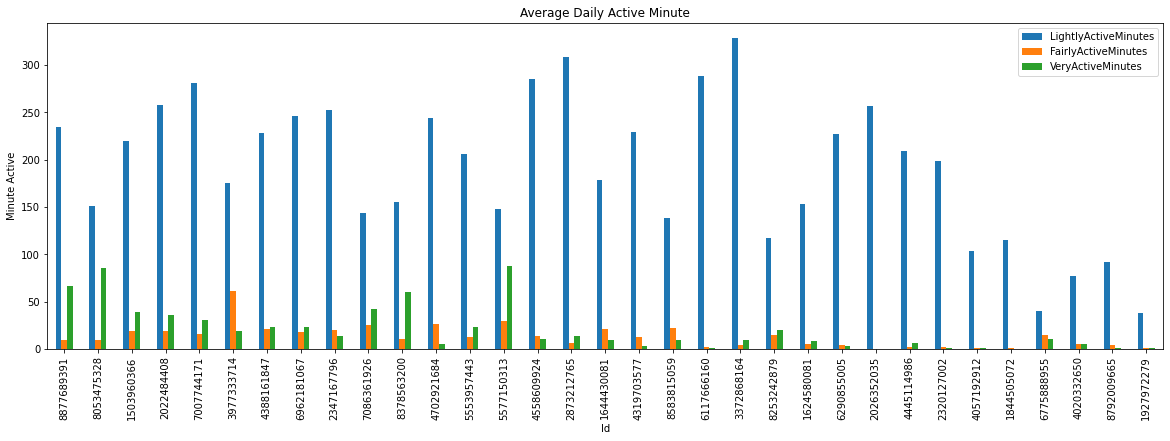

In [28]:
active_data.plot(x="Id", y=['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'], kind="bar",figsize=(20,6))
plt.title("Average Daily Active Minute")
plt.xlabel("Id")
plt.ylabel("Minute Active")
plt.show()

In [29]:
percent_active = active_data.copy()
percent_active['TotalActiveMinutes'] = active_data.SedentaryMinutes + active_data.LightlyActiveMinutes + active_data.FairlyActiveMinutes + active_data.VeryActiveMinutes 
percent_active.SedentaryMinutes = round(active_data.SedentaryMinutes / percent_active.TotalActiveMinutes * 100, 2)
percent_active.LightlyActiveMinutes = round(active_data.LightlyActiveMinutes / percent_active.TotalActiveMinutes * 100, 2)
percent_active.FairlyActiveMinutes = round(active_data.FairlyActiveMinutes / percent_active.TotalActiveMinutes * 100, 2)
percent_active.VeryActiveMinutes = round(active_data.VeryActiveMinutes / percent_active.TotalActiveMinutes * 100, 2)
percent_active.head()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalActiveMinutes
32,8877689391,78.17,16.49,0.70,4.64,1423.580645
27,8053475328,82.37,10.83,0.69,6.11,1393.709677
0,1503960366,75.33,19.53,1.70,3.44,1125.967742
5,2022484408,78.04,18.06,1.36,2.55,1425.677419
25,7007744171,76.29,20.29,1.18,2.24,1383.384615


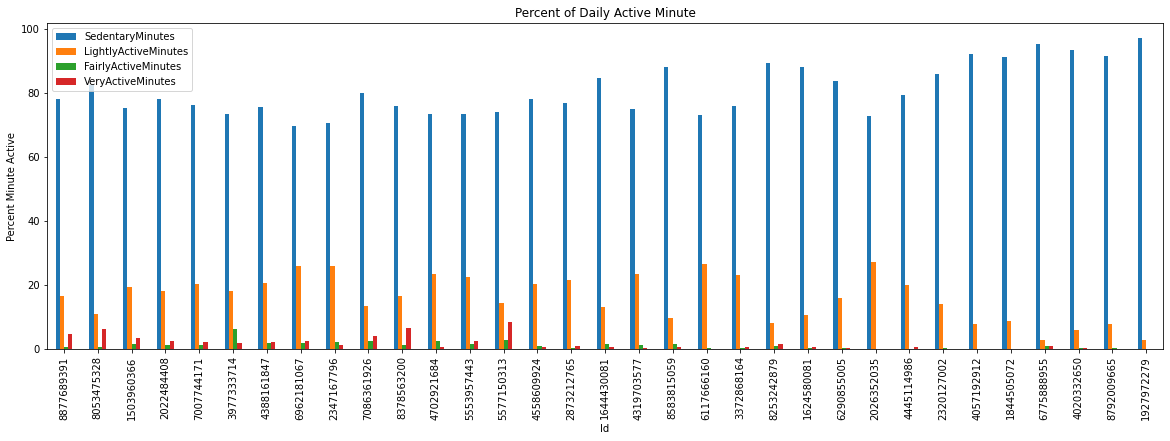

In [30]:
percent_active.plot(x="Id", y=['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'], kind="bar",figsize=(20,6))
plt.title("Percent of Daily Active Minute")
plt.xlabel("Id")
plt.ylabel("Percent Minute Active")
plt.show()

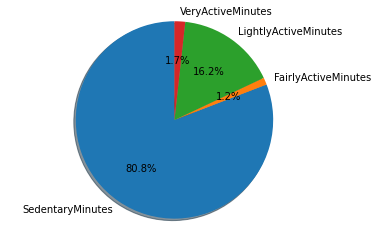

100.00121212121212


In [31]:
avg_seden = percent_active.SedentaryMinutes.mean()
avg_light = percent_active.LightlyActiveMinutes.mean()
avg_fair = percent_active.FairlyActiveMinutes.mean()
avg_very = percent_active.VeryActiveMinutes.mean()
total = avg_seden + avg_light + avg_fair + avg_very

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SedentaryMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'VeryActiveMinutes'
sizes = [avg_seden, avg_fair, avg_light, avg_very]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print(total)


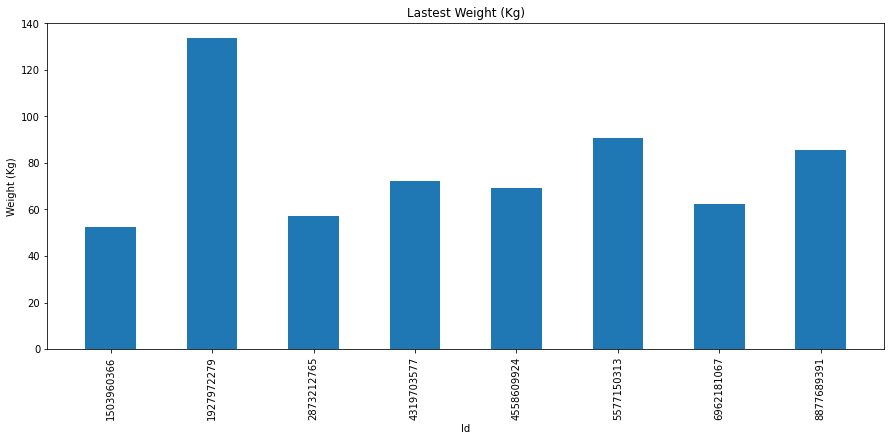

In [33]:
weight_log = pd.read_csv('weightLogInfo_merged.csv')
latest_weight_log = weight_log.groupby(['Id'])['Date'].max().reset_index().merge(weight_log, on = ['Id', 'Date'], how = 'inner')
first_weight_log = weight_log.groupby(['Id'])['Date'].min().reset_index().merge(weight_log, on = ['Id', 'Date'], how = 'inner')

fig = plt.figure(figsize = (15, 6))
plt.bar(latest_weight_log.Id.astype(str), latest_weight_log.WeightKg,width = 0.5)
plt.xticks(rotation = 90)
plt.title("Lastest Weight (Kg)")
plt.xlabel("Id")
plt.ylabel("Weight (Kg)")
plt.show()

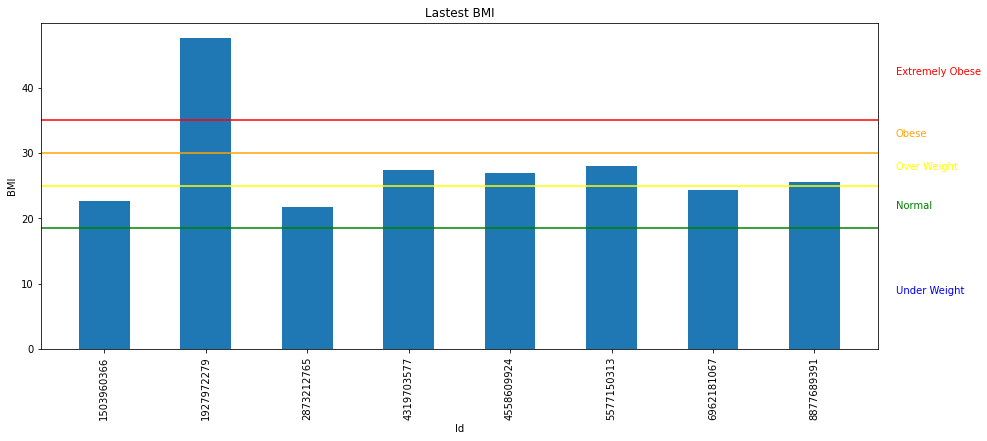

In [34]:
fig = plt.figure(figsize = (15, 6))
plt.bar(latest_weight_log.Id.astype(str), latest_weight_log.BMI,width = 0.5)
plt.xticks(rotation = 90)
plt.title("Lastest BMI")
plt.xlabel("Id")
plt.ylabel("BMI")

plt.text(7.8,42,'Extremely Obese',horizontalalignment='left', color = 'r')
plt.axhline(y=35, color='r', linestyle='-')
plt.text(7.8,32.5,'Obese',horizontalalignment='left', color = 'orange')
plt.axhline(y=30, color='orange', linestyle='-')
plt.text(7.8,27.5,'Over Weight',horizontalalignment='left', color = 'yellow')
plt.axhline(y=25, color='yellow', linestyle='-')
plt.text(7.8,21.5,'Normal',horizontalalignment='left', color = 'g')
plt.axhline(y=18.5, color='g', linestyle='-')
plt.text(7.8,8.5,'Under Weight',horizontalalignment='left', color = 'b')
plt.show()

In [35]:
count = 0
for i in latest_weight_log.BMI:
    if(i >= 25): 
        count+=1
print(str(round(count/ len(latest_weight_log.BMI) * 100, 2)) + "% of users has BMI >= 25 (Obese)")

62.5% of users has BMI >= 25 (Obese)
